In [33]:
# 필수 과제 2번 : 비지도 학습

# 고객 세분화 분석

# 라이브러리 불러오기
import pandas as pd  # 데이터프레임 처리
import numpy as np   # 수치 계산

# 데이터 로드
df = pd.read_csv('C:/Users/user/Desktop/AI_9/sparta_ai_9/챕터2 개인과제/챕터2 개인과제 자료/Mall_Customers.csv')
# read_csv : csv 파일을 데이터프레임으로 읽기

# 데이터 확인
print("데이터 크기:", df.shape) # shape : 데이터프레임의 크기를 출력
print("\n처음 5개 행:")
print(df.head()) # head() : 데이터프레임의 첫 5개 행을 출력

데이터 크기: (200, 5)

처음 5개 행:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [34]:
# 결측치 확인
print("\n결측치 개수:")
print(df.isnull().sum()) # isnull() : 결측치를 찾아서 True, False로 반환
                         # sum() : True, False를 합산하여 결측치 개수를 출력



결측치 개수:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [35]:
# 기술 통계량 확인
print("기술 통계량:")
print(df.describe()) # describe() : 기술 통계량을 출력

# 데이터 타입 확인
print("\n데이터 타입:")
print(df.dtypes) # dtypes : 데이터프레임의 각 열의 데이터 타입을 출력
#   ● Spending Score: int64 (정수형) - 소비 점수

기술 통계량:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

데이터 타입:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [36]:
# 출력 결과에 대한 설명 ▼

# 1.기술 통계량 (describe()):
#   ● 총 200명의 고객 정보 데이터 (count=200)
#   ● 나이 18~70세 , 평균 38.85세 (age,mean=38.85)
#   ● 연간 수입 15k$~137k$ 범위의 평균 60.56k$ (annual income,mean=60.56)
#   ● 소비 점수 1~99점 범위의 평균 50.2점 (spending score,mean=50.2)

# 2.데이터 타입 (dtypes):
#   ● CustomerID: int64 (정수형) - 고객 식별 번호
#   ● Gender: object (문자열) - 성별 정보
#   ● Age: int64 (정수형) - 나이
#   ● Annual Income: int64 (정수형) - 연간 수입

In [37]:
# 스케일링 


# 사이킷런의 전처리 모듈(sklearn.preprocessing) 불러오기
from sklearn.preprocessing import StandardScaler
# StandardScaler : 표준 정규 분포로 데이터를 변환하는 클래스


# 클러스터링에 사용할 특성 선택
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
# annual income (k$) : 연간 수입
# spending score (1-100) : 소비 점수

# 스케일링 수행
scaler = StandardScaler() # 표준 정규 분포로 데이터 변환
X_scaled = scaler.fit_transform(X)
# fit_transform() : 데이터를 스케일링하는 메서드, X 데이터를 스케일링

# 스케일링 결과 확인
print("스케일링 된 데이터의 처음 5개 행:")
print(X_scaled[:5]) # 스케일링 된 데이터의 처음 5개 행을 출력

스케일링 된 데이터의 처음 5개 행:
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


In [38]:
# 출력 결과에 대한 설명 ▼

# 1.스케일링 결과 확인
#   ● 각 행은 한 고객의 데이터를 나타낸다.
#   ● 첫 번째 열은 표준화된 'Annual Income'값
#   ● 두 번째 열은 표준화된 'Spending Score'값
#   ● 값들이 대부분 -2와 2 사이에 분포
#   ● 이는 표준정규분포의 특성을 보여준다.

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52789 (\N{HANGUL SYLLABLE CEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51665

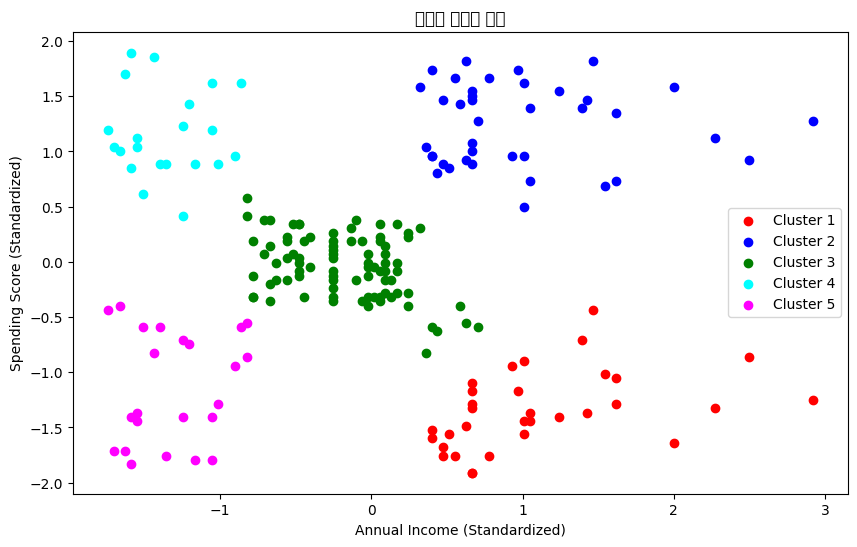

In [39]:
# 계층적 군집화

from sklearn.cluster import AgglomerativeClustering
# AgglomerativeClustering : 계층적 군집화 알고리즘

# 계층적 군집화 수행 (k=5로 설정)
hierarchical = AgglomerativeClustering(n_clusters=5)
h_clusters = hierarchical.fit_predict(X_scaled)

# 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
# matplotlib.pyplot : 그래프 그리기 라이브러리

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[h_clusters == 0, 0], X_scaled[h_clusters == 0, 1], c='red', label='Cluster 1')
plt.scatter(X_scaled[h_clusters == 1, 0], X_scaled[h_clusters == 1, 1], c='blue', label='Cluster 2')
plt.scatter(X_scaled[h_clusters == 2, 0], X_scaled[h_clusters == 2, 1], c='green', label='Cluster 3')
plt.scatter(X_scaled[h_clusters == 3, 0], X_scaled[h_clusters == 3, 1], c='cyan', label='Cluster 4')
plt.scatter(X_scaled[h_clusters == 4, 0], X_scaled[h_clusters == 4, 1], c='magenta', label='Cluster 5')

plt.title('계층적 군집화 결과')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.legend()
plt.show()

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47553 (

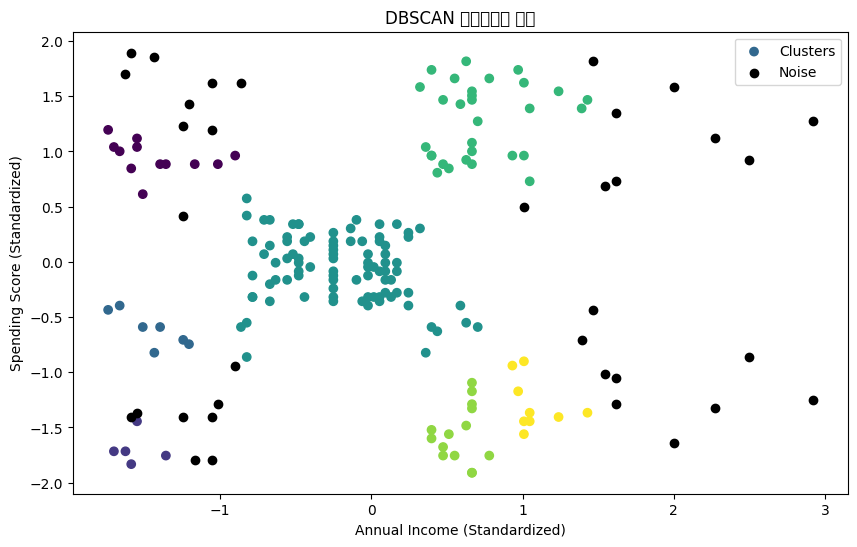

In [40]:
# DBSCAN 클러스터링

from sklearn.cluster import DBSCAN
# DBSCAN : 밀도 기반 군집화 알고리즘

# DBSCAN 클러스터링 수행
dbscan = DBSCAN(eps=0.3, min_samples=5) # eps : 반경(0.3), min_samples : 최소 샘플 수(5)    
db_clusters = dbscan.fit_predict(X_scaled) # fit_predict() : 클러스터링 수행

# 클러스터링 결과 시각화 및 노이즈 시각화
plt.figure(figsize=(10, 6)) # 그래프 크기 설정(10x6)
plt.scatter(X_scaled[db_clusters >= 0][:, 0], X_scaled[db_clusters >= 0][:, 1], 
           c=db_clusters[db_clusters >= 0], cmap='viridis', label='Clusters')
plt.scatter(X_scaled[db_clusters == -1, 0], X_scaled[db_clusters == -1, 1],
           c='black', label='Noise')
# [:, 0] : 첫 번째 열, [:, 1] : 두 번째 열
# cmap='viridis' : 색상 맵 설정 │ label='Clusters' : 레이블 설정
# db_clusters == -1 : 노이즈 클러스터 │ 0,1,2,3,4 : 클러스터 번호
# c='black' : 색상 설정 │ label='Noise' : 레이블 설정

# 그래프 설정
plt.title('DBSCAN 클러스터링 결과') # 그래프 제목 (title)
plt.xlabel('Annual Income (Standardized)') # x축 레이블 (xlabel)
plt.ylabel('Spending Score (Standardized)') # y축 레이블 (ylabel)
plt.legend() # 범례 표시 (legend)
plt.show() # 그래프 출력 (show)

In [41]:
# 출력 결과에 대한 설명 ▼

# 1.클러스터 형성 (컬러로 표시된 점들):
#   ● 여러 개의 클러스터가 자동으로 형성
#   ● 각각 다른 색상으로 표시된 그룹은 서로 다른 클러스터를 나타냄
#   ● 데이터의 밀도가 높은 영역에서 클러스터가 형성
# 2. 노이즈 포인트 (검은색 점들):
#   ● 어떤 클러스터에도 속하지 않는 점들은 '노이즈'로 분류되어 검은색으로 표시
#   ● 데이터가 희박한 영역의 점들이 노이즈로 분류

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50780 (\N{HANGUL SYLLABLE WAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50648 (\N{HANGUL SYLLABLE EL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48372 (\N{

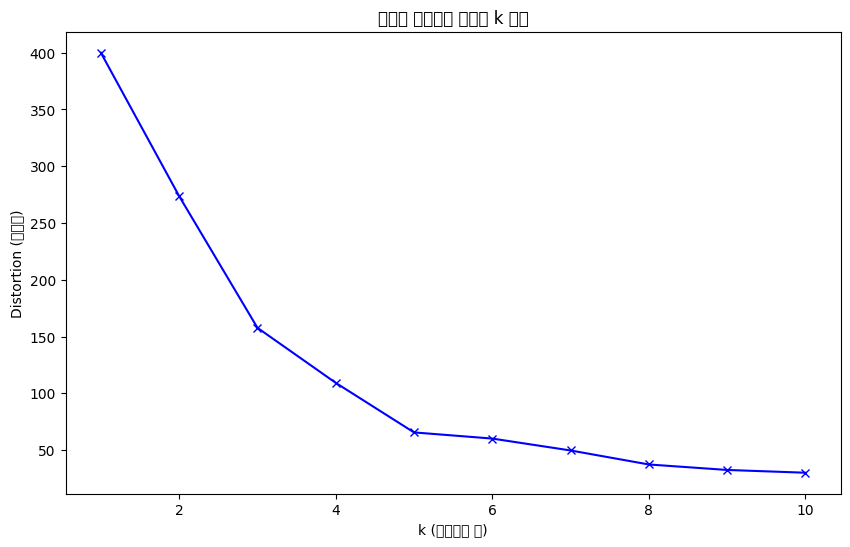

In [42]:
# 최적의 클러스터 수를 찾기 위해 엘보우 방법을 사용

# 사이킷런의 클러스터링 모듈(sklearn.cluster) 불러오기
from sklearn.cluster import KMeans
# KMeans : K-means 클러스터링을 수행하는 클래스

# 엘보우 방법을 위한 왜곡도(distortion) 계산
distortions = []
K = range(1, 11)  # 1~10개의 클러스터에 대해 테스트

for k in K: # K범위 내의 각 k에 대해, n_clusters=k 클러스터 수 k개,
    kmeans = KMeans(n_clusters=k, random_state=42) # 임의로 42를 랜덤 시드로 고정
    kmeans.fit(X_scaled) # fit() : 클러스터링 수행
    distortions.append(kmeans.inertia_) # inertia_ : 왜곡도 계산


# 엘보우 곡선 시각화
plt.figure(figsize=(10, 6)) # 그래프 크기 설정(10x6)
plt.plot(K, distortions, 'bx-') # 그래프 그리기(x축:k, y축:distortions, 마크:x)
plt.xlabel('k (클러스터 수)') # x축 레이블
plt.ylabel('Distortion (왜곡도)') # y축 레이블
plt.title('엘보우 방법으로 최적의 k 찾기') # 그래프 제목
plt.show() # 그래프 출력


In [43]:
# 출력 결과에 대한 설명 ▼

# 1.엘보우 곡선 시각화
#   ● k=1에서 k=2로 갈 때 왜곡도가 급격히 감소합니다
#   ● k=2에서 k=3으로 갈 때도 큰 폭으로 감소합니다
#   ● k=3에서 k=4로 갈 때도 어느 정도 감소합니다
#   ● k=5 이후부터는 감소폭이 매우 작아지는 것을 볼 수 있습니다

# 이런 경우, k=5가 최적의 클러스터 수라고 판단
# 이제 k=5로 설정하여 실제 K-means 클러스터링을 수행

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54868 (\N

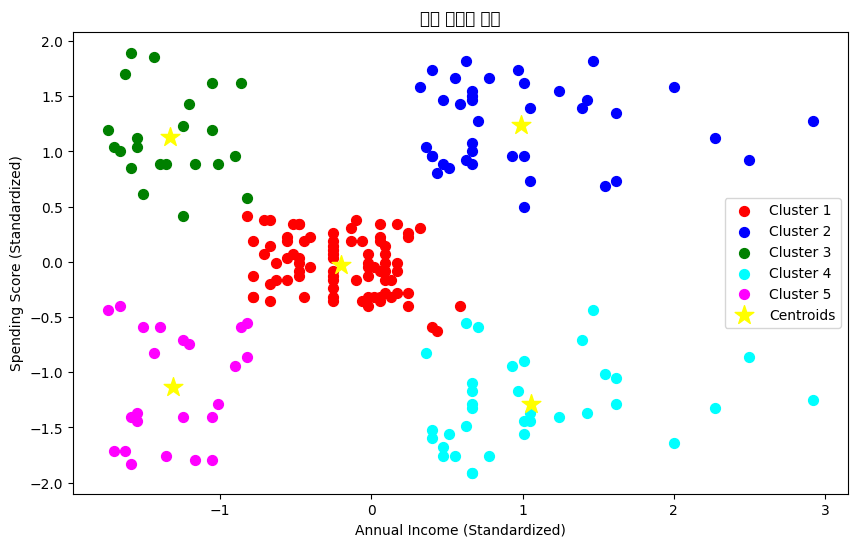

In [44]:
# k=5로 K-means 클러스터링 수행
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
# kmeans의 fit_predict()메서드를 사용하여 클러스터링 수행

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[clusters == 0, 0], X_scaled[clusters == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X_scaled[clusters == 1, 0], X_scaled[clusters == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X_scaled[clusters == 2, 0], X_scaled[clusters == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X_scaled[clusters == 3, 0], X_scaled[clusters == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[clusters == 4, 0], X_scaled[clusters == 4, 1], s=50, c='magenta', label='Cluster 5')

# 중심점 표시
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='yellow', marker='*', label='Centroids')

plt.title('고객 세분화 결과')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.legend()
plt.show()

# 클러스터링 결과 시각화 구분 방법
#   ● 각 클러스터는 서로 다른 색으로 표시
#   ● 중심점은 노란색 별표로 표시
#   ● 고객들이 어떤 특성을 기준으로 묶여있는지 시각적으로 확인


In [45]:
# 출력 결과에 대한 설명 ▼

# Cluster 1 (빨간색): 중간 소득, 중간 소비
#   ● 평균적인 소득과 소비 패턴을 보이는 일반적인 고객층

# Cluster 2 (파란색): 높은 소득, 높은 소비
#   ● 고소득이면서 소비도 많이 하는 프리미엄 고객층

# Cluster 3 (초록색): 낮은 소득, 높은 소비
#   ● 소득은 낮지만 소비성향이 높은 적극적 소비 고객층

# Cluster 4 (하늘색): 높은 소득, 낮은 소비
#   ● 고소득이지만 소비를 적게 하는 절약형 고객층

# Cluster 5 (자주색): 낮은 소득, 낮은 소비
#   ● 소득과 소비 모두 낮은 보수적 고객층

# 위를 활용한 판매 전략
# Cluster 2: 프리미엄 제품 마케팅
# Cluster 3: 할부/할인 프로모션
# Cluster 4: 투자/저축 상품 추천